In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('Data Fusion Assignment 2025 Data.csv')
df = df[df['class'] != 8]
df.sample(10)

,class,id,color,transparency,device_id,spectrum_0 + 740,spectrum_1 + 740,spectrum_2 + 740,spectrum_3 + 740,spectrum_4 + 740,...,sample_raw_321 + 740,sample_raw_322 + 740,sample_raw_323 + 740,sample_raw_324 + 740,sample_raw_325 + 740,sample_raw_326 + 740,sample_raw_327 + 740,sample_raw_328 + 740,sample_raw_329 + 740,sample_raw_330 + 740
80,2,24,white,o,802215F15396F9FE,0.800667,0.800958,0.801241,0.801368,0.801307,...,5.26,5.07,4.84,4.60,4.32,4.02,3.69,3.33,2.94,2.52
74,2,17,black,o,802215F15396F9FE,0.045858,0.045985,0.046094,0.046177,0.046235,...,0.32,0.30,0.29,0.27,0.26,0.24,0.22,0.20,0.18,0.15
260,5,56,blue,o,B0236F1F2D02C632,0.156947,0.158651,0.160731,0.163251,0.166286,...,4.66,4.47,4.27,4.03,3.78,3.50,3.19,2.87,2.52,2.14
68,2,8,blue,o,802215F15396F9FE,0.068445,0.069151,0.069983,0.070942,0.072053,...,2.20,2.12,2.02,1.92,1.80,1.68,1.54,1.39,1.23,1.05
346,7,4,white,o,B02EFC17B97B46B2,1.008688,1.008071,1.007309,1.006548,1.005864,...,5.90,5.66,5.38,5.08,4.74,4.38,3.98,3.56,3.11,2.64
255,5,51,purple,o,B0236F1F2D02C632,0.360529,0.367722,0.375433,0.383616,0.392261,...,5.02,4.82,4.60,4.35,4.08,3.78,3.45,3.10,2.72,2.31
72,2,14,black,o,802215F15396F9FE,0.066134,0.066162,0.066193,0.066213,0.066218,...,0.45,0.43,0.41,0.39,0.37,0.34,0.31,0.28,0.25,0.21
67,2,7,blue,o,802215F15396F9FE,0.037704,0.037993,0.038453,0.039086,0.039900,...,2.06,1.98,1.89,1.79,1.68,1.57,1.44,1.30,1.14,0.98
125,3,4,black,o,B02EFC17B97B46B2,0.110880,0.111208,0.111552,0.111930,0.112357,...,0.89,0.86,0.81,0.77,0.72,0.66,0.60,0.54,0.47,0.40
40,1,63,none,t,D02B30ACFD92433E,1.036134,1.035965,1.035823,1.035741,1.035679,...,6.67,6.41,6.12,5.79,5.42,5.02,4.58,4.11,3.60,3.06


In [ ]:
df['class'].value_counts()

,count
class,
5,76
1,62
2,60
3,58
6,51
4,36
7,20


In [ ]:
add_columns = ["class", "color", "transparency"]
selected_columns = [col for col in df.columns if col.startswith("spectrum_")] + add_columns
spectrum_df = df[selected_columns]
spectrum_df.head()

,spectrum_0 + 740,spectrum_1 + 740,spectrum_2 + 740,spectrum_3 + 740,spectrum_4 + 740,spectrum_5 + 740,spectrum_6 + 740,spectrum_7 + 740,spectrum_8 + 740,spectrum_9 + 740,...,spectrum_324 + 740,spectrum_325 + 740,spectrum_326 + 740,spectrum_327 + 740,spectrum_328 + 740,spectrum_329 + 740,spectrum_330 + 740,class,color,transparency
0,0.782157,0.754932,0.730555,0.709195,0.690707,0.674890,0.661358,0.649536,0.638722,0.628352,...,0.762691,0.762037,0.761381,0.761238,0.761424,0.761624,0.761410,1,white,o
1,0.948156,0.947904,0.947607,0.947237,0.946815,0.946384,0.945992,0.945662,0.945352,0.945005,...,0.837447,0.836808,0.836148,0.836038,0.836280,0.836527,0.836312,1,white,o
2,0.285657,0.285247,0.284841,0.284432,0.284022,0.283619,0.283231,0.282856,0.282474,0.282062,...,0.202864,0.202691,0.202516,0.202477,0.202525,0.202576,0.202517,1,none,s
3,0.296280,0.295966,0.295631,0.295269,0.294887,0.294499,0.294121,0.293758,0.293394,0.293011,...,0.226896,0.226739,0.226576,0.226560,0.226638,0.226717,0.226668,1,none,s
4,0.171568,0.171535,0.171500,0.171459,0.171414,0.171371,0.171338,0.171317,0.171298,0.171272,...,0.181026,0.180908,0.180784,0.180777,0.180844,0.180909,0.180873,1,none,t


In [ ]:
def change_column_name(column_names):
    updated_column_names = []
    for title in column_names:
        if title.startswith('spectrum') or title.startswith('wr_raw') or title.startswith('sample_raw'):
            updated_title = title.replace(' + 740', '')
            updated_column_names.append(updated_title)
        else:
            updated_column_names.append(title)
    return updated_column_names

In [ ]:
spectrum_df.columns = change_column_name(spectrum_df.columns)
spectrum_df.head()

,spectrum_0,spectrum_1,spectrum_2,spectrum_3,spectrum_4,spectrum_5,spectrum_6,spectrum_7,spectrum_8,spectrum_9,...,spectrum_324,spectrum_325,spectrum_326,spectrum_327,spectrum_328,spectrum_329,spectrum_330,class,color,transparency
0,0.782157,0.754932,0.730555,0.709195,0.690707,0.674890,0.661358,0.649536,0.638722,0.628352,...,0.762691,0.762037,0.761381,0.761238,0.761424,0.761624,0.761410,1,white,o
1,0.948156,0.947904,0.947607,0.947237,0.946815,0.946384,0.945992,0.945662,0.945352,0.945005,...,0.837447,0.836808,0.836148,0.836038,0.836280,0.836527,0.836312,1,white,o
2,0.285657,0.285247,0.284841,0.284432,0.284022,0.283619,0.283231,0.282856,0.282474,0.282062,...,0.202864,0.202691,0.202516,0.202477,0.202525,0.202576,0.202517,1,none,s
3,0.296280,0.295966,0.295631,0.295269,0.294887,0.294499,0.294121,0.293758,0.293394,0.293011,...,0.226896,0.226739,0.226576,0.226560,0.226638,0.226717,0.226668,1,none,s
4,0.171568,0.171535,0.171500,0.171459,0.171414,0.171371,0.171338,0.171317,0.171298,0.171272,...,0.181026,0.180908,0.180784,0.180777,0.180844,0.180909,0.180873,1,none,t


In [ ]:
copy_df = spectrum_df.copy(deep=True)
sp_df = copy_df.drop(['color', 'transparency', 'class'], axis=1)
#center the data
sp_df_centered = sp_df - sp_df.mean()
sp_df_centered.head()

,spectrum_0,spectrum_1,spectrum_2,spectrum_3,spectrum_4,spectrum_5,spectrum_6,spectrum_7,spectrum_8,spectrum_9,...,spectrum_321,spectrum_322,spectrum_323,spectrum_324,spectrum_325,spectrum_326,spectrum_327,spectrum_328,spectrum_329,spectrum_330
0,0.127818,0.101439,0.077623,0.056567,0.038177,0.022291,0.008538,-0.003649,-0.014958,-0.025934,...,0.041295,0.040764,0.040126,0.039314,0.038359,0.037347,0.036441,0.035659,0.034942,0.034110
1,0.293816,0.294411,0.294675,0.294609,0.294285,0.293785,0.293171,0.292477,0.291672,0.290719,...,0.115724,0.115372,0.114837,0.114070,0.113129,0.112114,0.111242,0.110514,0.109845,0.109012
2,-0.368682,-0.368246,-0.368091,-0.368197,-0.368508,-0.368980,-0.369590,-0.370329,-0.371206,-0.372224,...,-0.518963,-0.519656,-0.520119,-0.520514,-0.520987,-0.521518,-0.522319,-0.523241,-0.524106,-0.524783
3,-0.358059,-0.357527,-0.357301,-0.357360,-0.357643,-0.358099,-0.358700,-0.359427,-0.360286,-0.361275,...,-0.495056,-0.495688,-0.496111,-0.496481,-0.496939,-0.497458,-0.498236,-0.499127,-0.499965,-0.500632
4,-0.482771,-0.481958,-0.481432,-0.481170,-0.481116,-0.481227,-0.481482,-0.481868,-0.482382,-0.483014,...,-0.540963,-0.541606,-0.542015,-0.542351,-0.542770,-0.543250,-0.544020,-0.544922,-0.545773,-0.546426


In [ ]:
pca = PCA()
pca_components = pca.fit_transform(sp_df_centered)
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

In [ ]:
print("Explained variance ratio for first 5 components:", pca.explained_variance_ratio_[:5])

Explained variance ratio for first 5 components: [9.72268014e-01 1.74709738e-02 7.45398636e-03 2.15157625e-03
 3.60950072e-04]


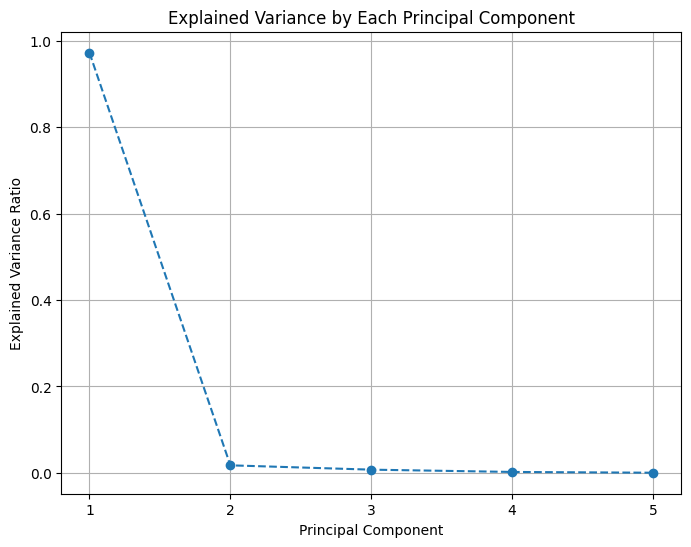

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), pca.explained_variance_ratio_[:5], marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

In [ ]:
selected_columns = spectrum_df[['class', 'color', 'transparency']]
concat = pd.concat([pca_df, selected_columns], axis=1)
color_transparency_dummies = pd.get_dummies(concat[['color', 'transparency']], drop_first=True)
concat = pd.concat([concat.drop(['color', 'transparency'], axis=1), color_transparency_dummies], axis=1)
concat.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,color_gray,color_green,color_none,color_orange,color_purple,color_red,color_white,color_yellow,transparency_s,transparency_t
0,0.609018,0.697369,-0.861202,1.168476,0.978226,0.079546,0.019330,0.050209,0.004921,-0.034479,...,False,False,False,False,False,False,True,False,False,False
1,3.557218,-0.670898,0.449403,-0.235081,0.044200,0.053779,0.096091,-0.025559,0.009561,-0.021703,...,False,False,False,False,False,False,True,False,False,False
2,-8.177879,-0.612164,0.253277,0.030084,-0.020270,-0.020493,-0.014073,0.010958,0.024380,0.002844,...,False,False,True,False,False,False,False,False,True,False
3,-7.849888,-0.559951,0.223723,0.029653,-0.015493,-0.038980,-0.026877,0.018724,0.021240,0.009870,...,False,False,True,False,False,False,False,False,True,False
4,-9.348266,-0.211292,0.021342,0.231270,-0.055002,0.036963,-0.010938,0.009308,-0.010538,-0.003386,...,False,False,True,False,False,False,False,False,False,True


Just One try

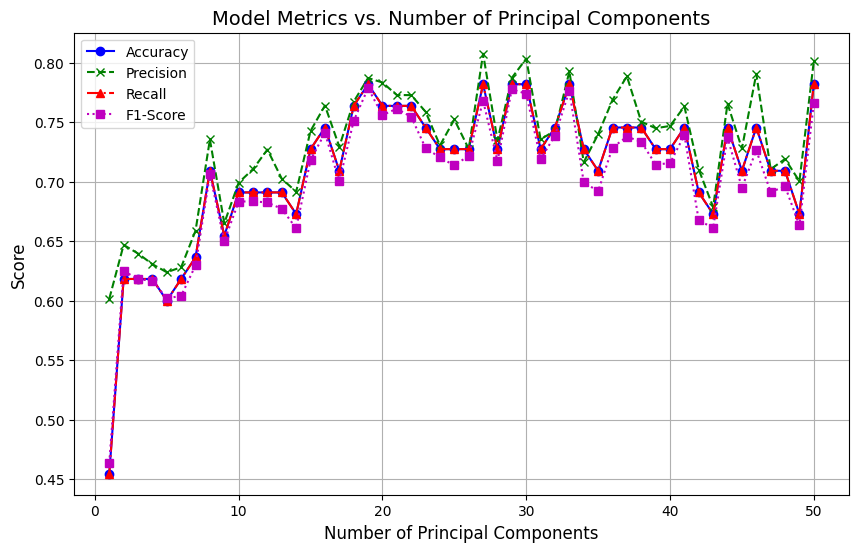

Best model found at n_components = 19 with F1-score = 0.7785


In [ ]:
#one try
pc_columns = [col for col in concat.columns if col.startswith('PC')]
one_hot_columns = [col for col in concat.columns if col not in pc_columns + ['class']]

rf_accuracies = []
rf_precisions = []
rf_recalls = []
rf_f1_scores = []
best_rf_model = None
best_f1_score = 0
best_n_components = None

for n_components in range(1, 51):
    # Select first n principal components and add one-hot encoded features
    X = concat[pc_columns[:n_components] + one_hot_columns]
    y = concat['class']

    # Fixed train-test split
    X_ditch, X_keep, y_ditch, y_keep = train_test_split(X, y, test_size=0.5, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_keep, y_keep, test_size=0.3, random_state=42)

    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)

    rf_accuracy = accuracy_score(y_test, rf_predictions)
    rf_accuracies.append(rf_accuracy)

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, rf_predictions, average='weighted', zero_division=0)

    rf_precisions.append(precision)
    rf_recalls.append(recall)
    rf_f1_scores.append(f1)

    if f1 > best_f1_score:
        best_f1_score = f1
        best_rf_model = rf_model
        best_n_components = n_components

plt.figure(figsize=(10, 6))

plt.plot(range(1, 51), rf_accuracies, label='Accuracy', marker='o', linestyle='-', color='b')
plt.plot(range(1, 51), rf_precisions, label='Precision', marker='x', linestyle='--', color='g')
plt.plot(range(1, 51), rf_recalls, label='Recall', marker='^', linestyle='-.', color='r')
plt.plot(range(1, 51), rf_f1_scores, label='F1-Score', marker='s', linestyle=':', color='m')

plt.title('Model Metrics vs. Number of Principal Components', fontsize=14)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Score', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()

print(f'Best model found at n_components = {best_n_components} with F1-score = {best_f1_score:.4f}')

Avg tries

In [ ]:
seeds = range(50)  # Try 50 different random seeds for the model
n_components_range = range(1, 51)

# identify right columns
pc_columns = [col for col in concat.columns if col.startswith('PC')]
one_hot_columns = [col for col in concat.columns if col not in pc_columns + ['class']]

all_accuracies = np.zeros((len(seeds), len(n_components_range)))
all_precisions = np.zeros((len(seeds), len(n_components_range)))
all_recalls = np.zeros((len(seeds), len(n_components_range)))
all_f1_scores = np.zeros((len(seeds), len(n_components_range)))

X = concat[pc_columns + one_hot_columns]
y = concat['class']
X_ditch, X_keep, y_ditch, y_keep = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_keep, y_keep, test_size=0.3, random_state=42)

for i, seed in enumerate(seeds):
    for j, n_components in enumerate(n_components_range):
        selected_features = pc_columns[:n_components] + one_hot_columns
        X_train_subset = X_train[selected_features]
        X_test_subset = X_test[selected_features]

        rf_model = RandomForestClassifier(random_state=seed)
        rf_model.fit(X_train_subset, y_train)
        rf_predictions = rf_model.predict(X_test_subset)

        all_accuracies[i, j] = accuracy_score(y_test, rf_predictions)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, rf_predictions, average='weighted', zero_division=0)

        all_precisions[i, j] = precision
        all_recalls[i, j] = recall
        all_f1_scores[i, j] = f1

# mean and standard variation
mean_accuracies = np.mean(all_accuracies, axis=0)
std_accuracies = np.std(all_accuracies, axis=0)

mean_precisions = np.mean(all_precisions, axis=0)
std_precisions = np.std(all_precisions, axis=0)

mean_recalls = np.mean(all_recalls, axis=0)
std_recalls = np.std(all_recalls, axis=0)

mean_f1_scores = np.mean(all_f1_scores, axis=0)
std_f1_scores = np.std(all_f1_scores, axis=0)

best_n_components = n_components_range[np.argmax(mean_f1_scores)]
best_f1_score = np.max(mean_f1_scores)

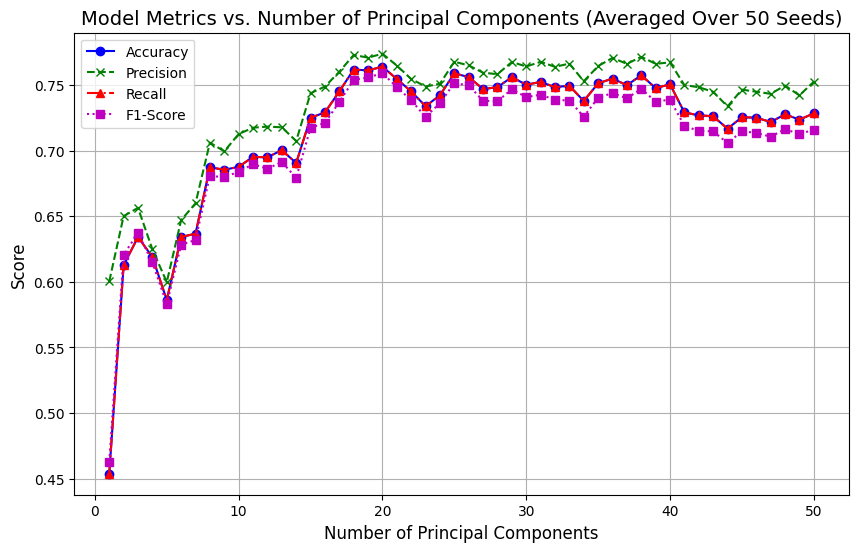

Best model found at n_components = 20 with F1-score = 0.7590


In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(n_components_range, mean_accuracies, label='Accuracy', marker='o', linestyle='-', color='b')
plt.plot(n_components_range, mean_precisions, label='Precision', marker='x', linestyle='--', color='g')
plt.plot(n_components_range, mean_recalls, label='Recall', marker='^', linestyle='-.', color='r')
plt.plot(n_components_range, mean_f1_scores, label='F1-Score', marker='s', linestyle=':', color='m')

plt.title('Model Metrics vs. Number of Principal Components (Averaged Over 50 Seeds)', fontsize=14)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Score', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()

print(f'Best model found at n_components = {best_n_components} with F1-score = {best_f1_score:.4f}')